# Reducción de dimensionalidad

## 1. Selección de características por filtrado

In [1]:
#Test234
# Ver https://scikit-learn.org/stable/modules/feature_selection.html#univariate-feature-selection

from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, mutual_info_classif
X, y = load_iris(return_X_y=True)
X.shape

(150, 4)

In [ ]:
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [ ]:
filtrado = SelectKBest(chi2, k=2).fit(X, y)

In [ ]:
filtrado.scores_

array([ 10.81782088,   3.7107283 , 116.31261309,  67.0483602 ])

In [ ]:
# no aplica para mutual_info_classif
filtrado.pvalues_

array([4.47651499e-03, 1.56395980e-01, 5.53397228e-26, 2.75824965e-15])

In [ ]:
X_new = filtrado.transform(X)
X_new[:5]

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2]])

## 2. Selección de características por wrapping - Backward elimination

Optimal number of features : 3


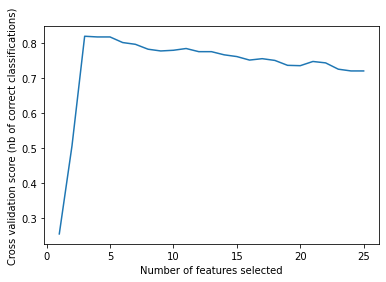

In [ ]:
# Ver https://scikit-learn.org/stable/auto_examples/feature_selection/plot_rfe_with_cross_validation.html

import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

# Build a classification task using 3 informative features
X, y = make_classification(n_samples=1000, n_features=25, n_informative=3,
                           n_redundant=2, n_repeated=0, n_classes=8,
                           n_clusters_per_class=1, random_state=0)

# Create the RFE object and compute a cross-validated score.
svc = SVC(kernel="linear")
# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(2),
              scoring='accuracy')
rfecv.fit(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [ ]:
X[:3]

array([[-0.27126113,  1.88663904,  0.4257523 , -0.88276904,  0.08182017,
        -0.12996586, -0.81134665, -0.56314334, -1.43090037,  1.84759586,
         0.38680014,  1.2207347 , -0.68674281,  2.26405884,  0.66702931,
        -0.16950537, -0.41086903,  0.24182054, -1.34830846,  0.84522543,
        -1.23049127,  2.45322899,  0.55820327, -0.54562849,  0.12710617],
       [-2.06947249,  1.72056896, -0.64016106,  0.60150829,  0.06898334,
        -0.8785432 , -0.55050613, -1.51073577,  0.224092  , -0.90189023,
        -2.38042316,  0.17982286,  1.097272  , -0.22637583,  0.41442306,
         0.2870897 ,  0.0975975 , -1.20911442,  0.87655629, -0.1257646 ,
         0.22428789, -0.52805035, -0.76494431, -1.57471131, -0.04753333],
       [-0.20769822, -0.33284919,  1.37265908,  1.08011916,  0.12621607,
        -0.57996437, -0.10975504,  0.3758979 ,  0.0366507 ,  0.5925967 ,
         0.65204044, -0.56257412, -1.00390861,  0.11921294, -1.30959852,
        -1.17323827, -0.70184592, -1.10048105,  0

In [ ]:
rfecv.n_features_

3

In [ ]:
rfecv.support_

array([False,  True, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False])

In [ ]:
X_new = rfecv.transform(X)
X_new[:3]

array([[ 1.88663904, -0.56314334, -1.34830846],
       [ 1.72056896, -1.51073577,  0.87655629],
       [-0.33284919,  0.3758979 ,  0.26920378]])

Ver también: [Selección de características en base a importancia](https://scikit-learn.org/stable/modules/feature_selection.html#select-from-model)